<a href="https://colab.research.google.com/github/erinijapranckeviciene/INF6018/blob/main/INF6018_Project/example_of_the_report/R_notebook_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of notebook with R code

The markdown cheat sheat [here https://www.markdownguide.org/cheat-sheet/](https://www.markdownguide.org/cheat-sheet/).

## Project: using *igraph* to demonstrate network analysis

### 1. Introduction of the project.

Here must be the introduction about your project. Here you can repeat the short summary of the project that you already submitted.  

We will look at the global migration data during 1960 year. The nodes are countries in which more that 1000 people emigrated in the year 1960. The edges connect countries between which the migration happened. In addition we use the data on each country showing mandatory number of years spent in school. The questions that we are asking are:
 1. which groups of countries are linked by migration?
 2. which countries had biggest emigration?
 3. how length of basic education and size of emigration may be related?  

### 2. Description of the dataset

**Dataset used in this project**. To demonstrate network community detection we used a total migration dataset and length of years at school dataset. The migration data is from 1960 year. The dataset was downloaded from World Bank  [World Development Indicators portal](https://databank.worldbank.org/source/world-development-indicators) .

The data from WB WDI portal can also be downloaded directly using R packages:
 - [WDI https://github.com/vincentarelbundock/WDI/tree/main](https://github.com/vincentarelbundock/WDI/tree/main)
 - [webstats https://cran.r-project.org/web/packages/wbstats/vignettes/wbstats.html](https://cran.r-project.org/web/packages/wbstats/vignettes/wbstats.html)

In this example the data is already preprocessed and is stored in Pajek format.

### 3. Methods

In this section we descibe methods, algorithms and demonstrate code with outputs of intermediate steps that we applied to perform analysis.

In [5]:
# set the working directory
#setwd("~/INF6018_Project/example_of_the_report/")


**Load the library**

In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(igraph, quietly=TRUE)

ERROR: Error in library(igraph, quietly = TRUE): there is no package called ‘igraph’


**Load datasets**

The network is presented as directed and as undirected network.

In [ ]:
undirected<-read_graph("migration_total_undirected.pajek", format=c("pajek"))
directed<-read_graph("migration_total_directed.pajek", format=c("pajek"))

### 3.1 Community detection

***Apply leiden community detection***

In [ ]:
# Quantiles 25% 2,  50% 3, 75% 4
r <- quantile(strength(undirected))[2] / (gorder(undirected) - 1)

# What is resolution
print("resolution")
print(r)

# Set seed for sake of reproducibility
set.seed(1)
ldc <- cluster_leiden(undirected, resolution = r)
print(ldc)

# Print community information
print("")
print("Community membership")
print(ldc$membership)

[1] "resolution"
     25% 
2508.152 
IGRAPH clustering leiden, groups: 10, mod: NA
+ groups:
  $`1`
   [1] "France"             "Puerto Rico"        "Czech Republic"    
   [4] "Mexico"             "Venezuela, RB"      "Norway"            
   [7] "Brazil"             "Tunisia"            "Romania"           
  [10] "Ukraine"            "Germany"            "Armenia"           
  [13] "Belarus"            "Lithuania"          "Algeria"           
  [16] "Latvia"             "Canada"             "Estonia"           
  [19] "New Zealand"        "United States"      "Australia"         
  [22] "Turkmenistan"       "Sweden"             "Israel"            
  [25] "Georgia"            "Tajikistan"         "Morocco"           
  + ... omitted several groups/vertices
[1] ""
[1] "Community membership"
 [1]  1  3  1  4  5  1  1  1  6  4  1  7  1  1  1  1  1  6  1  8  1  1  6  5  1
[26]  1  9  3 10  7  6  1  1  1  1 10  1  3  1  1  1  3  3  1  1  3  4  1  1  6
[51]  7  1  4  1  1  4  9  1  1  1  

***Visualize network and found communities on the directed network***

Warning message:
“`igraph.options()` was deprecated in igraph 2.0.0.
ℹ Please use `igraph_options()` instead.”


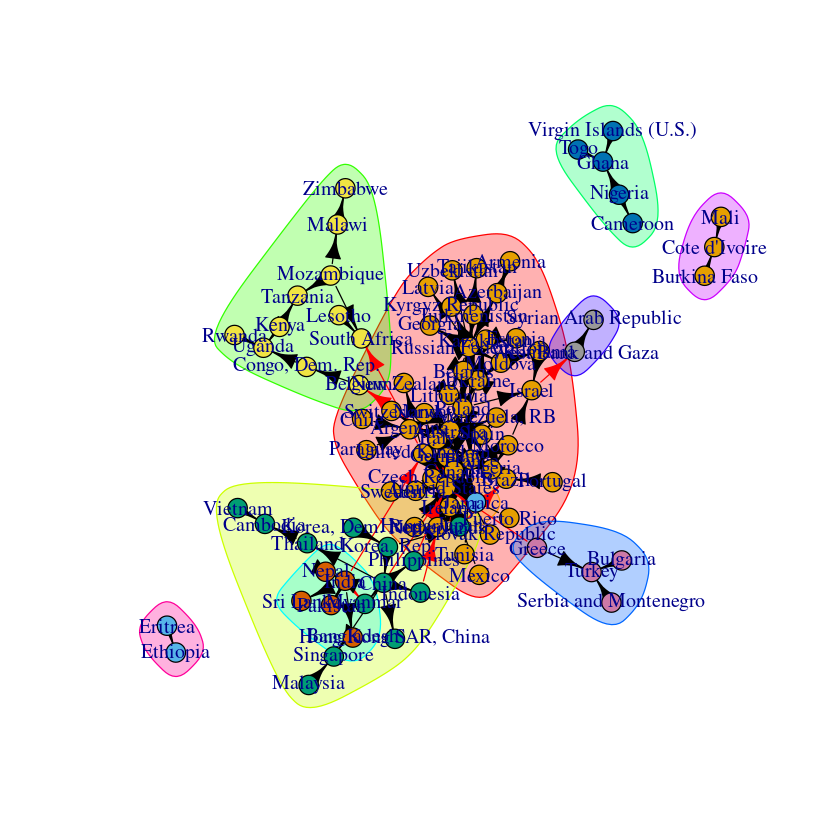

In [ ]:
fig.dim=c(12,10)
igraph.options(plot.layout=layout.graphopt, vertex.size=7)
plot(ldc, directed)

***Visualize network to file***

In [ ]:
plot_file="/home/erin/INF6018_Project/example_of_the_report/communityplot.pdf"
pdf(plot_file,30,30)
igraph.options(plot.layout=layout.graphopt, vertex.size=7)
plot(ldc, directed)
dev.off()


pdf 
  2

***Open pdf file that has been created***

In [ ]:
browseURL(paste0(plot_file) )

#### If needed images can be inserted in the notebook

![image.png](attachment:e51f233f-9653-448c-aade-72f70c82d559.png)

### 3.2 Add additional information to the network

We clustered countries using mandatory years at school in Orange using hieraachical clustering. We obtained a list of countries assigned to clusters. Countries in clusters are different based on the compulsary number of years pupils spend at school.

In [ ]:
# Read the file in which countries are clustered according to the compulsary years of education
library(readr)
education <- read_csv("education.csv")
#View(education) to inspect the data table
print(names(education))
# column Cluster contains cluster labels
# column Edu contains average compulsary education

Rows: 86 Columns: 27
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): node_label, Country Code, Cluster
dbl (24): index, node_id, 1999 [YR1999], 2000 [YR2000], 2001 [YR2001], 2002 ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] "node_label"    "Country Code"  "Cluster"       "index"        
 [5] "node_id"       "1999 [YR1999]" "2000 [YR2000]" "2001 [YR2001]"
 [9] "2002 [YR2002]" "2003 [YR2003]" "2004 [YR2004]" "2005 [YR2005]"
[13] "2006 [YR2006]" "2007 [YR2007]" "2008 [YR2008]" "2009 [YR2009]"
[17] "2010 [YR2010]" "2011 [YR2011]" "2012 [YR2012]" "2013 [YR2013]"
[21] "2014 [YR2014]" "2015 [YR2015]" "2016 [YR2016]" "2017 [YR2017]"
[25] "2018 [YR2018]" "2019 [YR2019]" "Edu"          


In [ ]:
Extract country and cluster and education information into a separate matrix

In [ ]:
edu_clusters<-data.frame(education$node_label, education$Cluster, education$Edu )
community_ids<-df1<-data.frame( ldc$names, ldc$membership )

merged <- merge(x = community_ids, y = edu_clusters, by.x = "ldc.names", by.y = "education.node_label")
merged

ldc.names,ldc.membership,education.Cluster,education.Edu
<chr>,<dbl>,<chr>,<dbl>
Algeria,1,C5,10.00000
Argentina,1,C3,12.23810
Armenia,1,C3,10.80950
Australia,1,C5,10.00000
Austria,1,C5,9.85714
Azerbaijan,1,C2,9.33333
Bangladesh,6,C4,5.00000
Belarus,1,C2,9.00000
Belgium,4,C3,12.00000


In [ ]:
print("How many clusters")
print(unique(merged$education.Cluster) )

print("How many communities")
print(unique(merged$ldc.membership) )


[1] "How many clusters"
[1] "C5" "C3" "C2" "C4" "C1"
[1] "How many communities"
 [1]  1  6  4  7  9  3  5 10  2  8


##### Not possible to clearly associate education cluster with the community.

In [ ]:
# cross tabulate the education and community membership
table(merged$education.Cluster, merged$ldc.membership)

    
      1  2  3  4  5  6  7  8  9 10
  C1  0  0  1  1  1  0  0  0  0  0
  C2 13  0  5  2  1  1  0  1  1  1
  C3 19  0  1  1  0  1  0  0  0  0
  C4  0  1  3  6  1  3  0  0  0  1
  C5 13  0  0  1  2  0  2  1  2  0

### 3.3 Map education information on the network

In [ ]:
#How to map color onto the vertices

clusters<-merged$education.Cluster
names(clusters)<-merged$ldc.names
#print(clusters)
cluster_colors<-c("red","darkgreen","blue","magenta","brown","cyan")
names(cluster_colors)<-c("C1","C2","C3","C4","C5",NA)
#verification cluster_colors[clusters[V(directed)] ]

In [ ]:
#How to map size onto the vertices

years<-merged$education.Edu
names(years)<-merged$ldc.names
# verification ifelse(is.na(years[V(directed)]), 5, years[V(directed)])

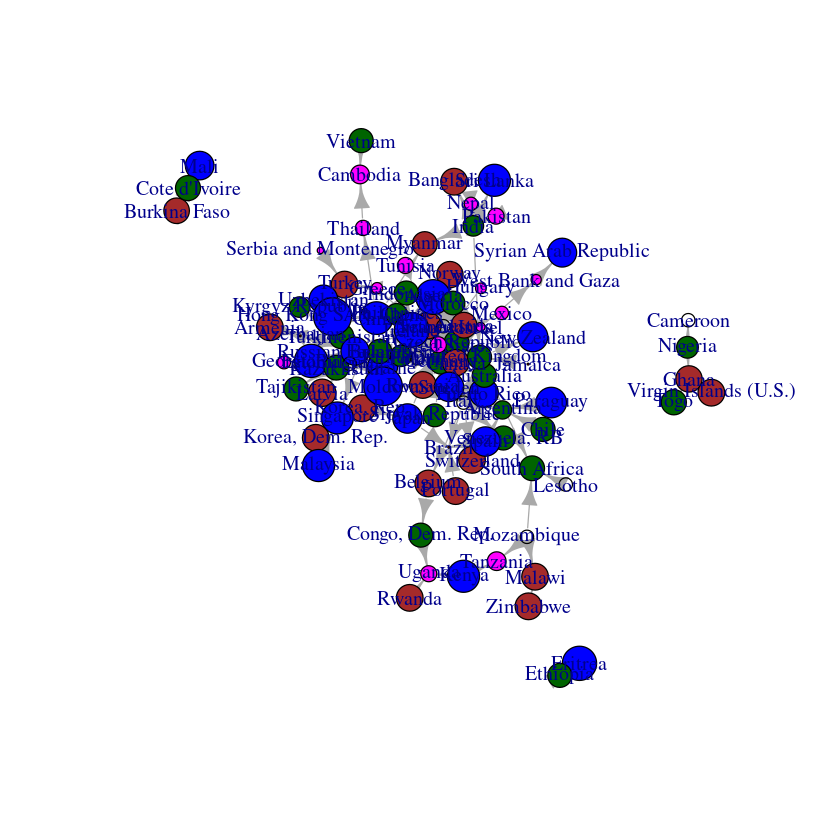

In [ ]:
plot(directed,
  layout = layout.graphopt, vertex.color =  cluster_colors[clusters[V(directed)] ],
     vertex.size = ifelse(is.na(years[V(directed)]), 5, years[V(directed)]) )

#### Add the community information, and education cluster information

Instead of node color, change the font color

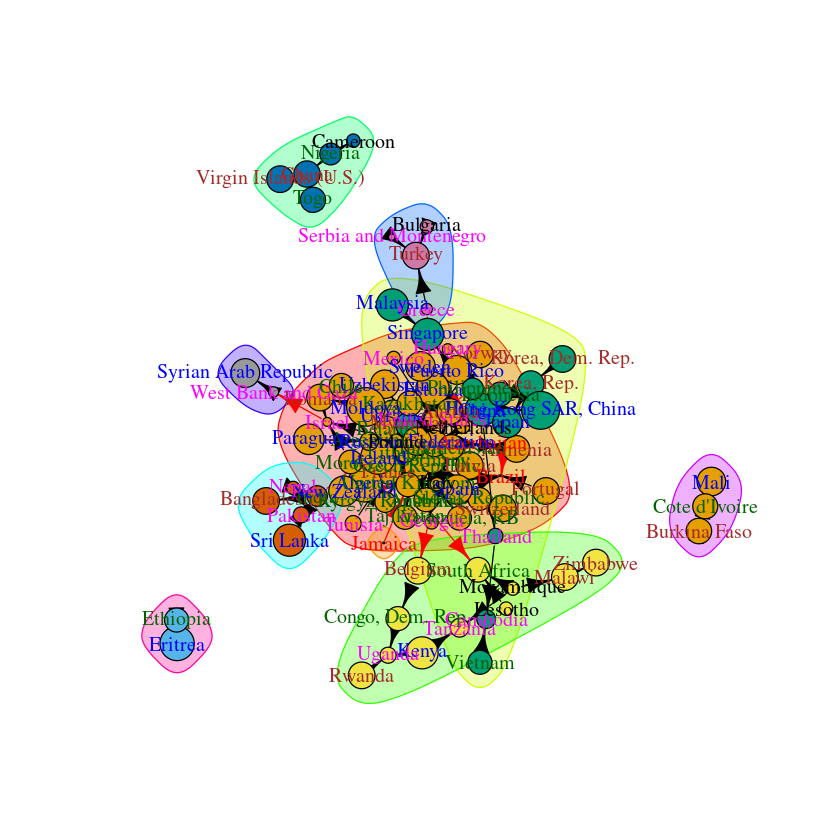

In [ ]:
plot(ldc, directed,
  layout = layout.graphopt, vertex.label.color =  cluster_colors[clusters[V(directed)] ],
     vertex.size = ifelse(is.na(years[V(directed)]), 5, years[V(directed)]) )

In [ ]:
# Create weights for links proportional to the number of people migrated
#print(E(directed)$weight)
weights <- floor(100*(E(directed)$weight / max(E(directed)$weight) ) )
arrow_weights <- floor(50*(E(directed)$weight / max(E(directed)$weight) ) )

names(weights) <- E(directed)
names(arrow_weights) <- E(directed)

In [ ]:
##### enlarge the result with pdf
plot_file="/home/erin/INF6018_Project/example_of_the_report/community_and_education_plot.pdf"
pdf(plot_file,60,60)

plot(ldc, directed,
  layout = layout.graphopt, vertex.label.color =  cluster_colors[clusters[V(directed)] ],
     vertex.size = ifelse(is.na(years[V(directed)]), 5, years[V(directed)]),
     vertex.label.cex = 2.8, edge.width = weights[E(directed)],
     edge.arrow.width = arrow_weights[E(directed)] )

dev.off()
browseURL(paste0(plot_file) )

pdf 
  2

In [ ]:
getwd()
dir()

[1] "/home/erin/INF6018_Project/example_of_the_report"

[1] "community_and_education_plot.pdf" "communityplot.pdf"               
[3] "education.csv"                    "migration_total_directed.pajek"  
[5] "migration_total_undirected.pajek" "R_notebook_example.ipynb"        
[7] "zoom.png"

### 4. Preliminary conclusions

The network analysis of the migration network together with compulsary education across different countries suggested a few insights.
 1. The leiden community detection algorithm revealed that migration occurrs in the communities of countries that are proximal geoographically.
 2. The clustering of countries by the years of compulsary education revealed five clusters differing by how many years pupil spend in school.
 3. Overlaying this information over the migration network partially suggests that in 1960 people migrated from countries with longer compulsary education to the countries with the shorted compulsary duration of education in western and some african countries. However there was an opposite trend in South Asian countries.
 4. The most migrants in 1960 migrated between India and Pakistan and then from Poland to Germany.  

### 5. References

    1. Igraph reference.  https://cran.r-project.org/web/packages/igraph/vignettes/igraph.html
    2. World bank open datasets. https://datatopics.worldbank.org/world-development-indicators/
